In [134]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import pandas as pd
import numpy as np
import xgboost, textblob, string
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import collections

import warnings
warnings.filterwarnings("ignore")

In [19]:
combine_df = pd.read_pickle("result.sav")
combine_df.head(3)

,id,label,tweet,clean_tweet,clean_tweet_reg,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thank, lyft, credit, use, cause, offer, wheel..."
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"


In [22]:
combine_df['tweet_stemmed_str'] = combine_df['tweet_stemmed'].apply(lambda x: " ".join(x))
combine_df['tweet_lemmatized_str'] = combine_df['tweet_lemmatized'].apply(lambda x: " ".join(x))

In [104]:
def train_model(classifier, feature_vector_train, label_train, feature_vector_valid, label_valid):
    classifier.fit(feature_vector_train, label_train)
    
    #predictions = classifier.predict(feature_vector_valid)
    predictions = classifier.predict_proba(feature_vector_valid)[:, 1]
    predictions[predictions>=0.3] = 1
    predictions[predictions<0.3] = 0

    return metrics.f1_score(predictions, label_valid)

In [105]:
train = combine_df[:31962].copy()

#### Задание 1.

Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

In [106]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_stemmed_str'], train['label'])

In [107]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(train_x)

xtrain_count =  count_vect.transform(train_x)
xtest_count =  count_vect.transform(valid_x)

In [108]:
accuracy_1 = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xtest_count, valid_y)
accuracy_1

0.6835187057633973

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [109]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_lemmatized_str'], train['label'])

In [110]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(train_x)

xtrain_count =  count_vect.transform(train_x)
xtest_count =  count_vect.transform(valid_x)

In [111]:
accuracy_2 = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xtest_count, valid_y)
accuracy_2

0.7012732615083251

#### Задание 2.

Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 
- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

In [112]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_stemmed_str'], train['label'])

In [113]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(train_x)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [114]:
accuracy_3 = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
accuracy_3

0.6484907497565725

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [115]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_lemmatized_str'], train['label'])

In [116]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(train_x)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [117]:
accuracy_4 = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
accuracy_4

0.6269925611052072

#### Задание 3.

Выведите результаты f1-score всех моделей, сделайте вывод.

In [118]:
print("LR, Count Vectors, tweet_stemmed: ", accuracy_1)
print("LR, Count Vectors, tweet_lemmatized: ", accuracy_2)
print("LR, WordLevel TF-IDF, tweet_stemmed: ", accuracy_3)
print("LR,WordLevel TF-IDF, tweet_lemmatized: ", accuracy_4)

LR, Count Vectors, tweet_stemmed:  0.6835187057633973
LR, Count Vectors, tweet_lemmatized:  0.7012732615083251
LR, WordLevel TF-IDF, tweet_stemmed:  0.6484907497565725
LR,WordLevel TF-IDF, tweet_lemmatized:  0.6269925611052072


Вывод: наилучший результат дает Count Vectors для столбца tweet_lemmatized

#### Задание 4.

Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова

In [145]:
words = []
for line in train['clean_tweet']: 
    line_words = line.split()
    line_words = [word for word in line_words if not word in set(stopwords.words('english'))]
    words.extend(line_words)

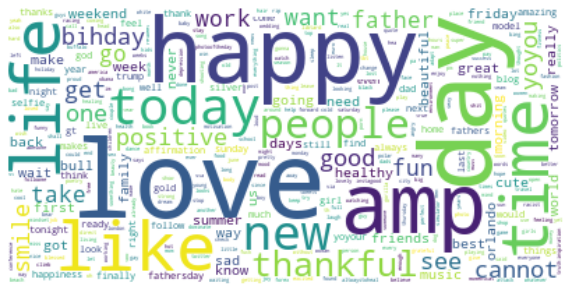

In [146]:
wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=5000,
 stopwords=stopwords_set
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Задание 5.

Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0).

In [148]:
words = []
for line in train.loc[train['label']==0,'clean_tweet'].values: 
    line_words = line.split()
    line_words = [word for word in line_words if not word in set(stopwords.words('english'))]
    words.extend(line_words)

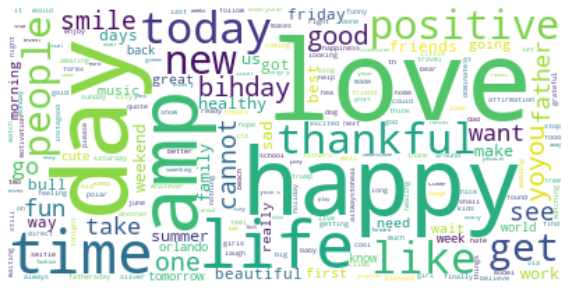

In [149]:
wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=5000,
 stopwords=stopwords_set
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Задание 6.

Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 

In [150]:
words = []
for line in train.loc[train['label']==1,'clean_tweet'].values: 
    line_words = line.split()
    line_words = [word for word in line_words if not word in set(stopwords.words('english'))]
    words.extend(line_words)

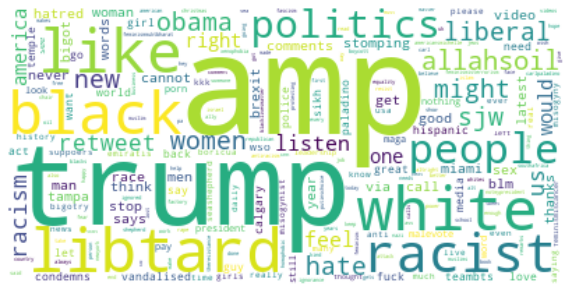

In [151]:
wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=5000,
 stopwords=stopwords_set
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()